In [10]:
# Importar bibliotecas
import sidrapy as sidra
import pandas as pd

# Pegando dados da população maior do que 15 anos do IBGE, dividido por região
dados_brutos = sidra.get_table(
    table_code = "9542",
    territorial_level = '2',
    ibge_territorial_code = "all",
    variable = "950",
)
dados = dados_brutos[:]

# Tornando os dados mais palatáveis
dados_relevantes = dados[['V','D1N']] # Deixando somente a quantidade populacional e a região
dados_relevantes = (dados_relevantes
                    .rename(columns= dados_relevantes.iloc[0])
                    .drop(0)
                    .rename(columns={"Grande Região": "Região"})
                    .set_index("Região")
                    .assign(
                        Valor = lambda x: x.Valor.astype(float)
                        )
                    .sort_values('Valor')
                    )

# Criando uma Classe que vai receber um Dataframe que contenha as populações estuduais e seus respectivos estados
class informacoes_da_federacao:
    def __init__(self, informacoes):
        self.informacoes = informacoes

    def pop_por_regiao(self):
        return self.informacoes.plot(color = 'black',ylabel= 'Em dezena de milhões',figsize=(10,5))
    
    def media(self):
        media = self.informacoes.mean()
        return print(f'A media populacional por estado é {media[0]:.0f}')
    
    def total(self):
        soma = self.informacoes.sum()
        return print(f'A soma da população é: {soma}')
    def pop_percent (self):
        c = self.informacoes.assign(populacao_percentual = lambda x: x/self.informacoes.sum())
        return c['populacao_percentual'].plot(grid = True,ylabel = 'População percentual')
    
# Exemplo de uso
tabela = informacoes_da_federacao(informacoes=dados_relevantes)

In [9]:
# Exemplo de uso 1
tabela = informacoes_da_federacao(informacoes=dados_relevantes)
tabela.total()

Valor    162951495.0
dtype: float64


<Axes: xlabel='Região', ylabel='Em dezena de milhões'>

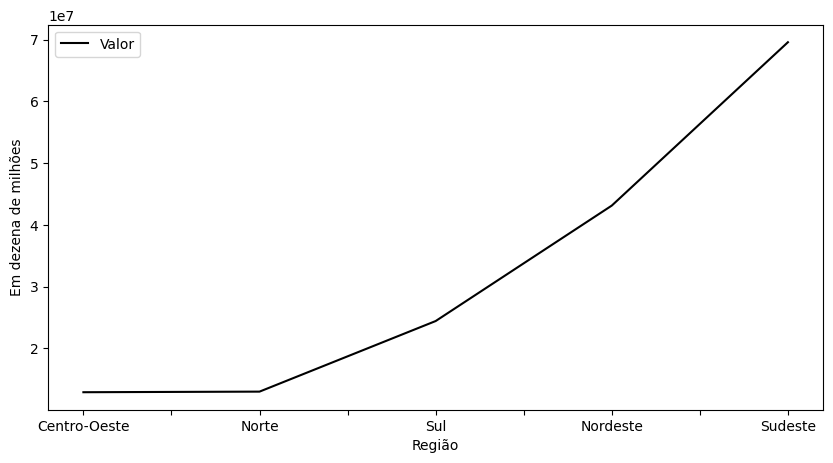

In [11]:
# Exemplo de uso 2
tabela.pop_por_regiao()

<Axes: xlabel='Região', ylabel='População percentual'>

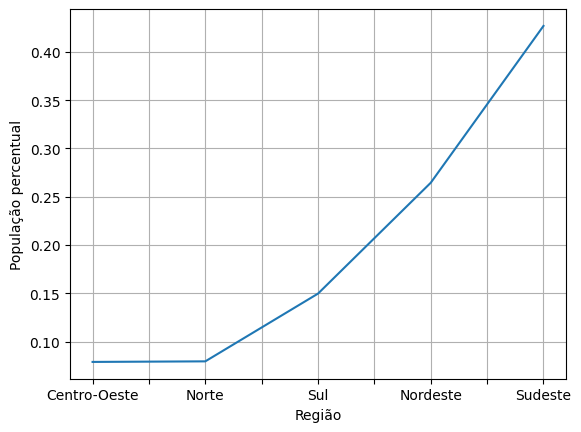

In [12]:
# Exemplo de uso 3
tabela.pop_percent()